In [1]:
import numpy as np
import pandas as pd
import random
import os
working_dir = "/Users/nkarisan/PycharmProjects/BTC_Cell_Line_Atlas_Manuscript"
os.chdir(working_dir)

from scripts.utils import Utils
from scripts.io_library import MyLib
import scripts.io_library as io_library
io_library.input_dir = 'input_data/'
io_library.output_dir = 'Figure1/output_fig1/'

In [2]:
import matplotlib
seed = 2023
random.seed(seed)
np.random.seed(seed)

matplotlib.use("nbagg")


%matplotlib inline
%config InlineBackend.figure_format = "retina"


%load_ext autoreload
%autoreload 2

In [3]:
os.getcwd()

'/Users/nkarisan/PycharmProjects/BTC_Cell_Line_Atlas_Manuscript'

In [4]:
rna_file = 'main_data/RNA/rna_cell_lines.csv'
pdx_file = 'main_data/RNA/rna_pdx.csv'
key_file = 'main_data/RNA/keys_pdx_cell-line.csv'
upset_file = 'cell_lines_master_upset_2024-4-13.csv'

cl_rna_df = MyLib.load_csv(rna_file, index_col=0).T
pdx_rna_df = MyLib.load_csv(pdx_file, index_col=0).T
key_df = MyLib.load_csv(key_file)


raw_upset_df = MyLib.load_csv(upset_file)
raw_upset_df.set_index('Cell_line', inplace=True, drop=True)
upset_df = raw_upset_df[(raw_upset_df['RNA']==1) & (raw_upset_df['PDX']==1)]
upset_df = upset_df[["Subtype"]]
cl_rna_df = cl_rna_df.loc[upset_df.index, :]
cl_rna_df, pdx_rna_df = Utils.match_columns_df(cl_rna_df, pdx_rna_df)
cl_rna_df = cl_rna_df.loc[key_df['Cell line'], :]
pdx_rna_df = pdx_rna_df.loc[key_df['Name'],:]

input_data/main_data/RNA/rna_cell_lines.csv  is loaded, shape:  (17649, 79)

input_data/main_data/RNA/rna_pdx.csv  is loaded, shape:  (17649, 20)

input_data/main_data/RNA/keys_pdx_cell-line.csv  is loaded, shape:  (20, 6)

input_data/cell_lines_master_upset_2024-4-13.csv  is loaded, shape:  (87, 11)



In [5]:
cl_rna_df = cl_rna_df.apply(lambda x:x-x.median())
pdx_rna_df = pdx_rna_df.apply(lambda x:x-x.median())

# K-Nearest Neighbor

For each PDX, calculate its Euclidean distance to all cell line and determine the rank K of its corresponding cell lines, indicating the Kth nearest neighbor. 

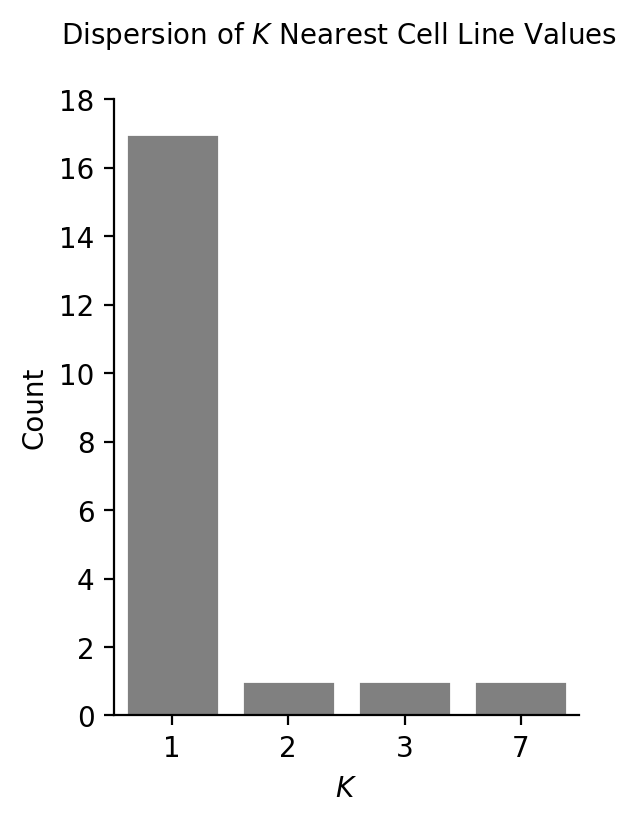

In [6]:
df = Utils.pdx_cell_line_distance(pdx_df=pdx_rna_df, cl_df=cl_rna_df, save_figure=True)

plot the K for each pair

In [7]:
df

,PDX,K
Cell_line,,
ICC17,Q12050,7
ICC11,MG98-3,3
ICC2,LCCH4,2
ICC4,SS101,1
ICC13-7,MG59-7,1
GB2,MG102,1
ICC8,MG10,1
ICC12,MG94,1
ICC16,HBT110 X2,1


saved None.pdf


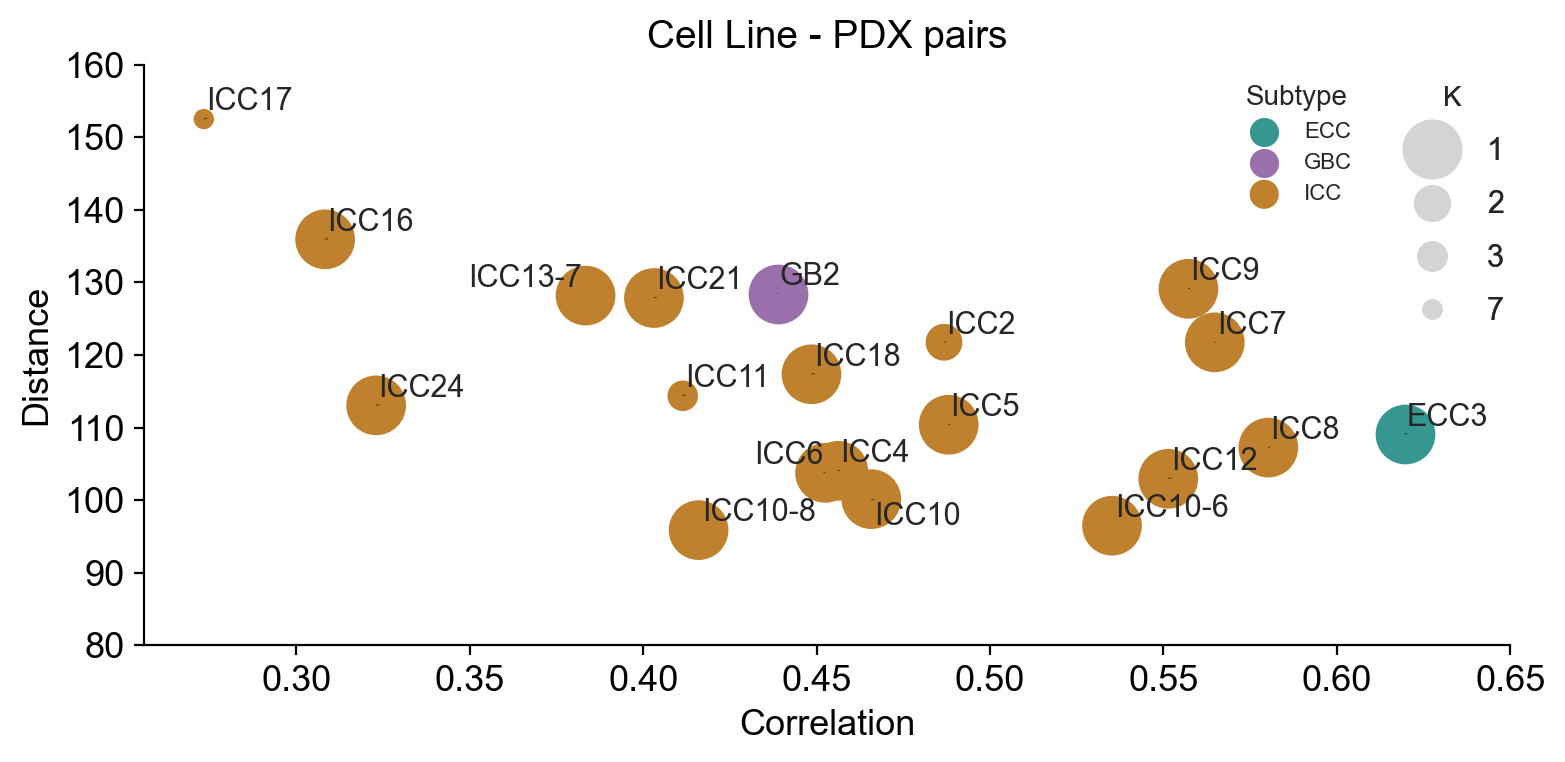

In [8]:
size_dic = {1: 420, 2: 150, 3: 100, 7: 40}
df2 = Utils.scatter_pdx_and_cell(pdx_df=pdx_rna_df, cl_df=cl_rna_df, k_df=df, upset_df=upset_df, size_dic=size_dic, save_figure=True)

In [9]:
df2=df2.applymap(lambda x:round(x, 2))
df2

,Correlation,Distance
Cell_line,,
ICC4,0.46,104.06
ICC10,0.47,100.15
ICC6,0.45,103.77
ICC10-6,0.54,96.50
ICC9,0.56,129.13
ICC5,0.49,110.40
ICC11,0.41,114.39
ICC10-8,0.42,95.89
ICC24,0.32,113.07


In [10]:
df3 = pd.concat([df, df2.loc[df.index]], axis=1)
MyLib.save_csv(df3, 'pdx_cell_line_comparison.csv')


File  Figure1/output_fig1/pdx_cell_line_comparison.csv saved, shape: (20, 4)
